In [22]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import packages 
import re
import shutil
import os


# 1 Import total number of genes 

In [23]:
total = pd.read_csv("12_gene_length_distribution/total_number_of_genes.csv")
total = total.rename(columns={"x": "gene_name"})

In [24]:
len(total["gene_name"])

45667

In [25]:
len(total["gene_name"].unique())

45667

# 2 Import list of gene names 
with more that 10 reads in total (over all three conditions)

In [26]:
genenames = pd.read_csv("12_gene_length_distribution/number_of_genes_with_total_of_10_reads.csv")
genenames = genenames.rename(columns={"x": "gene_name"})

# 2 Import annotation   

In [27]:
# import ccar_annotation.gtf as pd df 
import pandas as pd 

annotation = pd.read_csv('12_gene_length_distribution/carcar_annotation_v5.gtf', sep='\t', comment='#', header=None)
# renaming the header of the annotation file
annotation = annotation.rename({0: 'seqname',
                                1: 'source',
                                2: 'feature',
                                3: 'start',
                                4: 'stop',
                                5: 'score',
                                6: 'strand',
                                7: 'frame',
                                8: 'attribute'}, axis=1)

    
# define a function to extract the geneid
def extract_gene_id(attributes):
    # Using a regular expression to match and extract the desired part
    match = re.search(r'gene_id "([^"]+)"', attributes)
    if match:
        return match.group(1)
    else:
        return 0 # Return 0 if there is no match
    
# filtering the column feature for transcritps
annotation = annotation[annotation['feature'] == 'transcript']
# Apply the function to the "attributes" column and create a new column with the extracted gene ids
annotation['gene_id'] = annotation['attribute'].apply(extract_gene_id)

In [28]:
annotation

,seqname,source,feature,start,stop,score,strand,frame,attribute,gene_id
1,scaffold_1,AUGUSTUS,transcript,246717,248723,.,-,.,"gene_id ""scaffold_1-g45517""; transcript_id ""sc...",scaffold_1-g45517
9,scaffold_1,AUGUSTUS,transcript,316526,317083,.,-,.,"gene_id ""scaffold_1-g45518""; transcript_id ""sc...",scaffold_1-g45518
12,scaffold_1,AUGUSTUS,transcript,316526,317116,.,-,.,"gene_id ""scaffold_1-g45518""; transcript_id ""sc...",scaffold_1-g45518
16,scaffold_1,AUGUSTUS,transcript,317117,317526,.,-,.,"gene_id ""scaffold_1-g45519""; transcript_id ""sc...",scaffold_1-g45519
22,scaffold_1,AUGUSTUS,transcript,319660,320224,.,-,.,"gene_id ""scaffold_1-g45520""; transcript_id ""sc...",scaffold_1-g45520
...,...,...,...,...,...,...,...,...,...,...
2161996,scaffold_72,AUGUSTUS,transcript,43108,43483,.,-,.,"gene_id ""scaffold_72-g45760""; transcript_id ""s...",scaffold_72-g45760
2162002,scaffold_86,AUGUSTUS,transcript,17392,31005,.,+,.,"gene_id ""scaffold_86-g45770""; transcript_id ""s...",scaffold_86-g45770
2162020,scaffold_129,AUGUSTUS,transcript,346,2361,.,-,.,"gene_id ""scaffold_129-g45565""; transcript_id ""...",scaffold_129-g45565
2162028,scaffold_129,AUGUSTUS,transcript,2573,9987,.,-,.,"gene_id ""scaffold_129-g45566""; transcript_id ""...",scaffold_129-g45566


In [29]:
# keep only the lines of the annotation df that contain the gene_id from the gene names list 
data = pd.merge(annotation, genenames, left_on='gene_id', right_on='gene_name')


In [30]:
data

,seqname,source,feature,start,stop,score,strand,frame,attribute,gene_id,gene_name
0,scaffold_1,AUGUSTUS,transcript,246717,248723,.,-,.,"gene_id ""scaffold_1-g45517""; transcript_id ""sc...",scaffold_1-g45517,scaffold_1-g45517
1,scaffold_1,AUGUSTUS,transcript,515753,518618,.,+,.,"gene_id ""scaffold_1-g45527""; transcript_id ""sc...",scaffold_1-g45527,scaffold_1-g45527
2,scaffold_1,AUGUSTUS,transcript,756361,759237,.,-,.,"gene_id ""scaffold_1-g45531""; transcript_id ""sc...",scaffold_1-g45531,scaffold_1-g45531
3,scaffold_1,AUGUSTUS,transcript,756361,760009,.,-,.,"gene_id ""scaffold_1-g45531""; transcript_id ""sc...",scaffold_1-g45531,scaffold_1-g45531
4,scaffold_1,GeneMark.hmm3,transcript,771845,774680,.,-,.,"gene_id ""scaffold_1-g45532""; transcript_id ""sc...",scaffold_1-g45532,scaffold_1-g45532
...,...,...,...,...,...,...,...,...,...,...,...
76330,scaffold_72,AUGUSTUS,transcript,43108,43483,.,-,.,"gene_id ""scaffold_72-g45760""; transcript_id ""s...",scaffold_72-g45760,scaffold_72-g45760
76331,scaffold_86,AUGUSTUS,transcript,17392,31005,.,+,.,"gene_id ""scaffold_86-g45770""; transcript_id ""s...",scaffold_86-g45770,scaffold_86-g45770
76332,scaffold_129,AUGUSTUS,transcript,346,2361,.,-,.,"gene_id ""scaffold_129-g45565""; transcript_id ""...",scaffold_129-g45565,scaffold_129-g45565
76333,scaffold_129,AUGUSTUS,transcript,2573,9987,.,-,.,"gene_id ""scaffold_129-g45566""; transcript_id ""...",scaffold_129-g45566,scaffold_129-g45566


In [31]:
# which genes are not unique 
data['gene_name'].value_counts()

gene_name
ccar_ua21-g19374       50
ccar_ub21-g42394       45
ccar_ua03-g3612        37
ccar_ua10-g10756       34
ccar_ub20-g41263       34
                       ..
ccar_ub10-g33033        1
ccar_ub10-g33030        1
ccar_ub10-g33025        1
ccar_ub10-g33023        1
scaffold_186-g45580     1
Name: count, Length: 40259, dtype: int64

In [32]:
# calculate max length of gene length
data['length'] = data['stop'] - data['start']
maxima = data['length'].max()
minima = data['length'].min()
# calculate the average
mean_genelength = data['length'].mean()

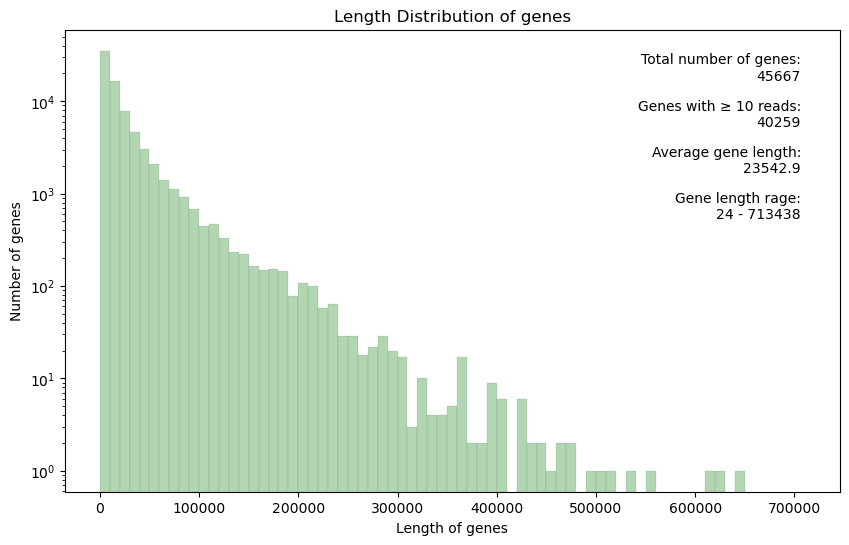

In [33]:
# PLOT: Length Distribution of Genes 
plt.figure(figsize=(10, 6))
plt.title('Length Distribution of genes')
# on the x axis: Length of genes
plt.xlabel('Length of genes')
# on the y axis: Number of genes
plt.ylabel('Number of genes')

# plot the histogram
plt.hist(data['stop'] - data['start'], bins=range(minima,maxima, 10000), color='#B2D6B1', edgecolor='black', linewidth=0.05)
plt.yscale('log')



# LABELS: 
# add label for total number of genes 
plt.text(0.95, 0.95, f'Total number of genes:\n{len(total["gene_name"])}', ha='right', va='top', transform=plt.gca().transAxes)
# add total number of unique genes 
plt.text(0.95, 0.85, f"Genes with ≥ 10 reads:\n{len(data['gene_name'].unique())}", ha='right', va='top', transform=plt.gca().transAxes)
# add numer label for average at the top right corner 
plt.text(0.95, 0.75, f'Average gene length:\n{mean_genelength:.1f}', ha='right', va='top', transform=plt.gca().transAxes)

plt.text(0.95, 0.65, f'Gene length rage:\n{minima} - {maxima}', ha='right', va='top', transform=plt.gca().transAxes)


# save the plot as png with 500 dpi
plt.savefig('12_gene_length_distribution/gene_length_distribution.png', dpi=500)
